<a href="https://colab.research.google.com/github/E1250/udl-ref/blob/main/ch12/12_1_Self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 12.1: Self Attention**

This notebook builds a self-attention mechanism from scratch, as discussed in section 12.2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [98]:
import numpy as np
import matplotlib.pyplot as plt

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$.  



In [99]:
# Set seed so we get the same random numbers
np.random.seed(3)
# Number of inputs
N = 3
# Number of dimensions of each input
D = 4
# Create an empty list
all_x = []
# Create elements x_n and append to list
for n in range(N):
  all_x.append(np.random.normal(size=(D,1)))
# Print out the list
print(all_x)

[array([[ 1.78862847],
       [ 0.43650985],
       [ 0.09649747],
       [-1.8634927 ]]), array([[-0.2773882 ],
       [-0.35475898],
       [-0.08274148],
       [-0.62700068]]), array([[-0.04381817],
       [-0.47721803],
       [-1.31386475],
       [ 0.88462238]])]


We'll also need the weights and biases for the keys, queries, and values (equations 12.2 and 12.4)

In [100]:
# Set seed so we get the same random numbers
np.random.seed(0)

# Choose random values for the parameters
omega_q = np.random.normal(size=(D,D))
omega_k = np.random.normal(size=(D,D))
omega_v = np.random.normal(size=(D,D))
beta_q = np.random.normal(size=(D,1))
beta_k = np.random.normal(size=(D,1))
beta_v = np.random.normal(size=(D,1))

Now let's compute the queries, keys, and values for each input

In [101]:
# Make three lists to store queries, keys, and values
all_queries = []
all_keys = []
all_values = []

# For every input
for x in all_x:
  # TODO -- compute the keys, queries and values.
  # Replace these three lines
  query = np.dot(omega_q, x) + beta_q  # Linear transformation for queries
  key = np.dot(omega_k, x) + beta_k    # Linear transformation for keys
  value = np.dot(omega_v, x) + beta_v  # Linear transformation for values

  all_queries.append(query)
  all_keys.append(key)
  all_values.append(value)

We'll need a softmax function (equation 12.5) -- here, it will take a list of arbitrary numbers and return a list where the elements are non-negative and sum to one


Sure! The softmax function can be expressed in LaTeX as follows:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Where:
- $ z_i $ is the $ i $-th element of the input vector.
- $ K $ is the total number of elements in the input vector.
- $ e $ is the base of the natural logarithm.

This formula computes the softmax output $\sigma(z_i)$ for each element $z_i$ in the input vector.

In [102]:
def softmax(items_in):
    # Subtracting max for numerical stability
    exps = np.exp(items_in - np.max(items_in))

    # Compute the softmax values
    items_out = exps / np.sum(exps)

    return items_out

Now compute the self attention values:

In [103]:
# Assuming all_queries, all_keys, all_values, N, and D are defined
# Create empty list for output
all_x_prime = []

# For each output
for n in range(N):
    # Create list for dot products of query n with all keys
    all_km_qn = []

    # Compute the dot products
    query_n = all_queries[n]  # Get the n-th query

    for key in all_keys:
        # Compute the appropriate dot product
        dot_product = np.dot(query_n.T, key)  # Dot product between query and key
        all_km_qn.append(dot_product[0, 0])  # Append the scalar value

    # Compute attention weights using softmax
    attention = softmax(all_km_qn)

    # Print result (should be positive sum to one)
    print("Attentions for output", n)
    print(attention)

    # Compute a weighted sum of all of the values according to the attention (equation 12.3)
    x_prime = np.zeros((D, 1))  # Initialize x_prime

    for i, value in enumerate(all_values):
        x_prime += attention[i] * value  # Weighted sum of values

    all_x_prime.append(x_prime)

# Print out true values to check you have it correct
print("x_prime_0_calculated:", all_x_prime[0].transpose())
print("x_prime_0_true: [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]")
print("x_prime_1_calculated:", all_x_prime[1].transpose())
print("x_prime_1_true: [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]")
print("x_prime_2_calculated:", all_x_prime[2].transpose())
print("x_prime_2_true: [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]")

Attentions for output 0
[1.24326146e-13 9.98281489e-01 1.71851130e-03]
Attentions for output 1
[2.79525306e-12 5.85506360e-03 9.94144936e-01]
Attentions for output 2
[0.00505708 0.00654776 0.98839516]
x_prime_0_calculated: [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]
x_prime_0_true: [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]
x_prime_1_calculated: [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]
x_prime_1_true: [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]
x_prime_2_calculated: [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]
x_prime_2_true: [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]


Now let's compute the same thing, but using matrix calculations.  We'll store the $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ in the columns of a $D\times N$ matrix, using equations 12.6 and 12.7/8.

Note:  The book uses column vectors (for compatibility with the rest of the text), but in the wider literature it is more normal to store the inputs in the rows of a matrix;  in this case, the computation is the same, but all the matrices are transposed and the operations proceed in the reverse order.

In [104]:
# Define softmax operation that works independently on each column
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax

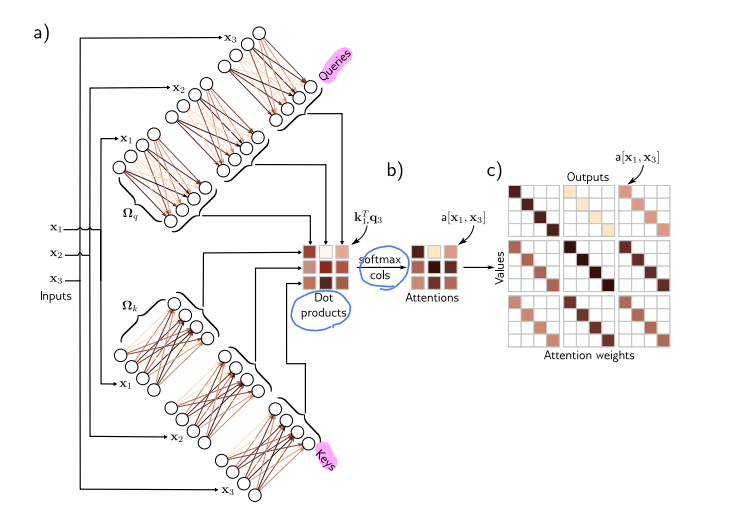

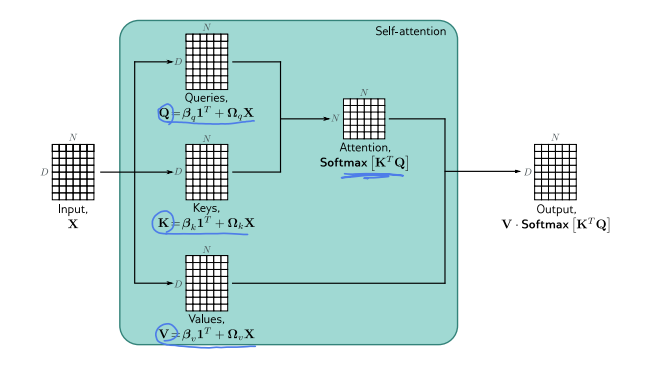

In [105]:
 # Now let's compute self attention in matrix form
def self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

  # TODO -- Write this function
  # 1. Compute queries, keys, and values
  query = np.dot(omega_q, X) + beta_q
  key = np.dot(omega_k, X) + beta_k
  value = np.dot(omega_v, X) + beta_v

  # 2. Compute dot products
  dot_prod = np.dot(query.T, key)  # Dot product query and key

  # 3. Apply softmax to calculate attentions
  attention = softmax_cols(dot_prod.T).T  # Ensure the correct shape (N, N) (NOTE: I 've got help here from GPT models.)

  # 4. Weight values by attentions
  X_prime = np.dot(attention, value.T)

  # Replace this line
  # X_prime = np.zeros_like(X);

  return X_prime

In [106]:
# Copy data into matrix
X = np.zeros((D, N))
X[:,0] = np.squeeze(all_x[0])
X[:,1] = np.squeeze(all_x[1])
X[:,2] = np.squeeze(all_x[2])

# Run the self attention mechanism
X_prime = self_attention(X, omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print(X_prime)

[[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]
 [ 1.64201168 -0.08470004  4.02764044  2.18690791]
 [ 1.61949281 -0.06641533  3.96863308  2.15858316]]


Make sure all your shape are just correct, or you will get different values.

[[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]

[[ 1.64201168 -0.08470004  4.02764044  2.18690791]]

[[ 1.61949281 -0.06641533  3.96863308  2.15858316]]

If you did this correctly, the values should be the same as above.

TODO:  

Print out the attention matrix
You will see that the values are quite extreme (one is very close to one and the others are very close to zero.  Now we'll fix this problem by using scaled dot-product attention.

Equation in 12.9
$$
Sa[X] = V.Softmax[\dfrac{K^T Q}{\sqrt{D_q}}].
$$

In [107]:
# Now let's compute self attention in matrix form
def scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

  # TODO -- Write this function
  # 1. Compute queries, keys, and values
  query = np.dot(omega_q, X) + beta_q
  key = np.dot(omega_k, X) + beta_k
  value = np.dot(omega_v, X) + beta_v

  # 2. Compute dot products
  dot_prod = np.dot(query.T, key)  # Dot product query and key

  # 3. Scale the dot products as in equation 12.9
  dot_prod = dot_prod / np.sqrt(D)

  # 4. Apply softmax to calculate attentions
  attention = softmax_cols(dot_prod.T).T

  # 5. Weight values by attentions
  X_prime = np.dot(attention, value.T)

  # Replace this line
  # X_prime = np.zeros_like(X);

  return X_prime

In [108]:
# Run the self attention mechanism
X_prime = scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print(X_prime)

[[ 0.97411966 -0.23738409 -0.72333202 -0.34413007]
 [ 1.59622051 -0.09516106  3.70194096  2.01339538]
 [ 1.32638014  0.13062402  3.02371664  1.6902419 ]]


TODO -- Investigate whether the self-attention mechanism is covariant with respect to permutation.
If it is, when we permute the columns of the input matrix $\mathbf{X}$, the columns of the output matrix $\mathbf{X}'$ will also be permuted.


**Answer**: No, self-attention is **not covariant** with the permutation of the input matrix. In self-attention mechanisms, the order of the input tokens matters. If you permute (rearrange) the input sequence, the computed attention weights and output will change, as the attention mechanism computes context-aware representations based on the relative positions and relationships between input elements.

In [113]:
# GPT Example
# Permute columns of matrix
def permute_matrix(X, perm):
    return X[:, perm]  # Permute the columns

# Original matrix X
X = np.random.rand(4, 4)  # Example input (4, 4)
# Generate a random permutation of columns
perm = np.random.permutation(X.shape[1])

# Run self-attention on original X
X_prime_original = scaled_dot_product_self_attention(X, omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)
# Permute X
X_permuted = permute_matrix(X, perm)
# Run self-attention on permuted X
X_prime_permuted = scaled_dot_product_self_attention(X_permuted, omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)
# Permute the output X' from the original input based on the same permutation
X_prime_permuted_check = permute_matrix(X_prime_original, perm)

# Compare the permuted version of original X' with the output of permuted X
is_covariant = np.allclose(X_prime_permuted, X_prime_permuted_check)

# Output the results
print("X' from original input:\n", X_prime_original)
print("X' from permuted input:\n", X_prime_permuted)
print("Permuted X' from original input:\n", X_prime_permuted_check)
print("Is self-attention covariant with permutation? ", is_covariant)

X' from original input:
 [[-2.0761111   1.83165831 -2.02581216 -1.08637438]
 [-2.06720197  1.82552153 -2.02688867 -1.08466722]
 [-2.11114428  1.87001384 -2.00217705 -1.06533206]
 [-2.08617519  1.84508177 -2.01564537 -1.07563069]]
X' from permuted input:
 [[-2.0761111   1.83165831 -2.02581216 -1.08637438]
 [-2.06720197  1.82552153 -2.02688867 -1.08466722]
 [-2.08617519  1.84508177 -2.01564537 -1.07563069]
 [-2.11114428  1.87001384 -2.00217705 -1.06533206]]
Permuted X' from original input:
 [[-2.0761111   1.83165831 -1.08637438 -2.02581216]
 [-2.06720197  1.82552153 -1.08466722 -2.02688867]
 [-2.11114428  1.87001384 -1.06533206 -2.00217705]
 [-2.08617519  1.84508177 -1.07563069 -2.01564537]]
Is self-attention covariant with permutation?  False
